# Predict CLV

## Background

## Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('online_retail_dataset.xlsx', sheet_name='Online Retail')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


*Description* and *CustomerID* columns have NULL values

In [5]:
df.shape

(541909, 8)

## Quick EDA

### NULL values

In [22]:
print('Number of missing values in the dataset:', df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: 136534
Percentage of missing values in the dataset: 3.149375633178264


In [25]:
print("Number of missing values in 'Description' column:", df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", df['Description'].isnull().sum()*100/df.shape[0])

Number of missing values in 'Description' column: 1454
Percentage of missing values in 'Description' column: 0.2683107311375157


In [26]:
print("Number of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum()*100/df.shape[0])

Number of missing values in 'CustomerID' column: 135080
Percentage of missing values in 'CustomerID' column: 24.926694334288598


About 25% of CustomerIDs is missing

### Duplicates

In [12]:
# Check the number of duplicated values
df.duplicated().sum().sum()

5268

In [29]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [32]:
duplicates[:20]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


It seems that products, which were bought together in one invoice, were considered as duplicates. However, there are no duplicates, if we look at the *Description* column

### Number of unique customers

In [33]:
df['CustomerID'].nunique()

4372

### Number of purchases

In [34]:
df['InvoiceNo'].nunique()

25900

### Period of time

In [35]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [36]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

### Country

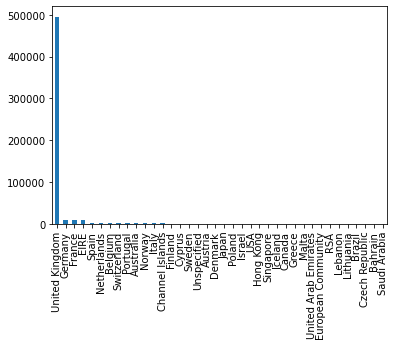

In [40]:
df['Country'].value_counts().plot.bar();

In [41]:
df['Country'].nunique()

38

So we have approximately 1 year data record of 25,900 purchases for 4,372 unique users made in 38 countries (mostly in the UK)

### Quantity and unit price of the products

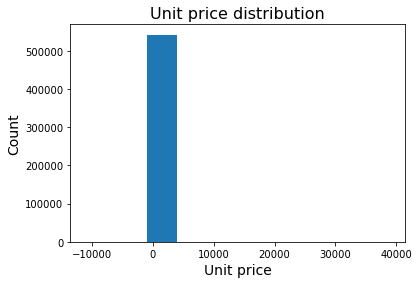

In [44]:
# Let's look at the price distribution of the products

plt.hist(data=df, x='UnitPrice')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

It seems that we have negative values and some outliers representing very expensive products. The negative values may be associated with cancelled or refunded orders. Let's remove negative records and outliers and look at the price distribution.

In [46]:
df['UnitPrice'].describe(percentiles=[.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
50%           2.080000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

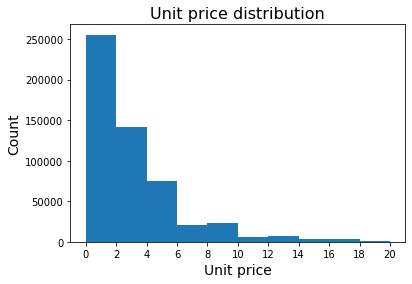

In [51]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='UnitPrice', bins=bins)
plt.xticks(ticks, ticks)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=16);

The price for most of the products is equal or less than 10£

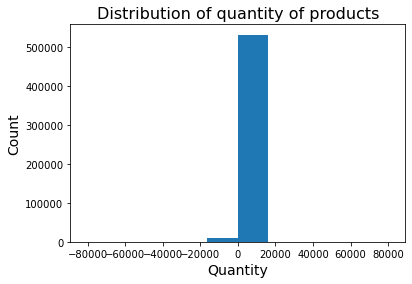

In [52]:
# Let's look at the quantity of the products

plt.hist(data=df, x='Quantity')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

In [54]:
df['Quantity'].describe(percentiles=[.99])

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
50%           3.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

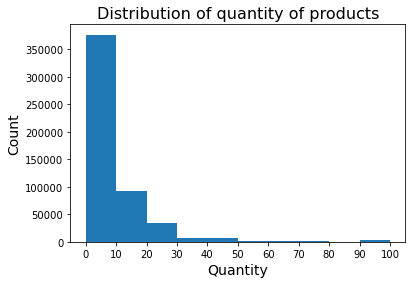

In [55]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data=df, x='Quantity', bins=bins)
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

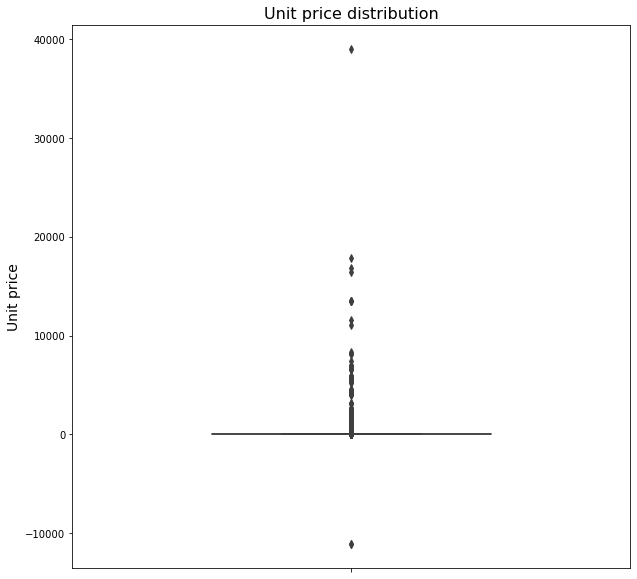

In [42]:


plt.figure(figsize=(10, 10))
bplot = sns.boxplot(y="UnitPrice", data=df, width=0.5)
bplot.axes.set_title("Unit price distribution",fontsize=16)
bplot.set_ylabel("Unit price", fontsize=14)
bplot.tick_params(labelsize=10)